In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression

In [86]:
# load the data
data = pd.read_csv('california_housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [59]:
df = data.fillna(data.mean(numeric_only=True)).iloc[:, :-1]

In [60]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
# y_train = y_train.values.ravel()

In [62]:
y_train.ravel()

array([110900., 113900., 148900., ..., 280700., 113900., 197300.])

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14447, 8), (6192, 8), (14447,), (6192,))

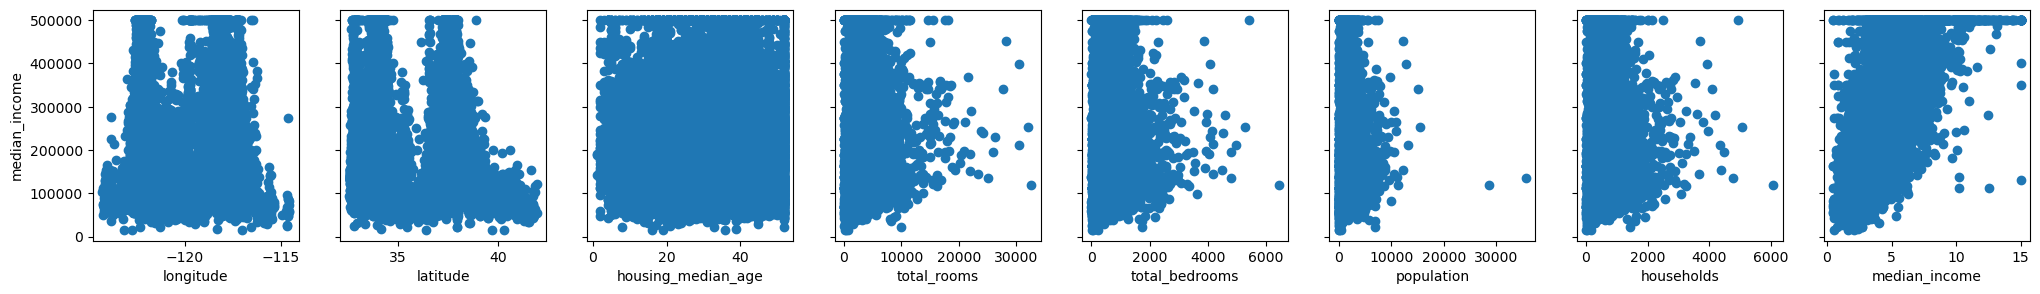

In [64]:
# plot data
_, n = X_train.shape
fig, ax = plt.subplots(1, n, sharey=True, figsize=(25, 3))
for i in range(n):
    ax[i].scatter(X_train[X_train.columns[i]], y_train)
    ax[i].set_xlabel(X_train.columns[i])   
    
ax[0].set_ylabel(X.columns[-1])

plt.show()

In [65]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

print(f"Peak to peak X_train : {np.ptp(X_train, axis=0)}")
print(f"Peak to peak X_norm  : {np.ptp(X_norm, axis=0)}")

Peak to peak X_train : longitude                 9.7500
latitude                  9.4000
housing_median_age       51.0000
total_rooms           32625.0000
total_bedrooms         6444.0000
population            35679.0000
households             6081.0000
median_income            14.5002
dtype: float64
Peak to peak X_norm  : [ 4.86862253  4.39489185  4.06766691 15.33304596 15.71310411 31.58206259
 16.29120849  7.61462284]


In [66]:
model_sgd = SGDRegressor(max_iter=1000)
model_sgd.fit(X_norm, y_train)

print(f"Number of iterations completed: {model_sgd.n_iter_}, number of weight updates: {model_sgd.t_}")

Number of iterations completed: 22, number of weight updates: 317835.0


In [67]:
b_sgd = model_sgd.intercept_
w_sgd = model_sgd.coef_

print(f"model parameters: b = {b_sgd}, w = {w_sgd}")

model parameters: b = [206814.96114167], w = [-87260.95691971 -90279.76079991  15291.76923692 -13015.95923742
  37032.18403851 -42631.81789919  25156.64653415  74363.37155724]


In [68]:
y_pred_sgd = model_sgd.predict(X_test_norm)

print(f"Accuracy: {model_sgd.score(X_test_norm, y_test)*100:0.2f}%")

Accuracy: 64.00%


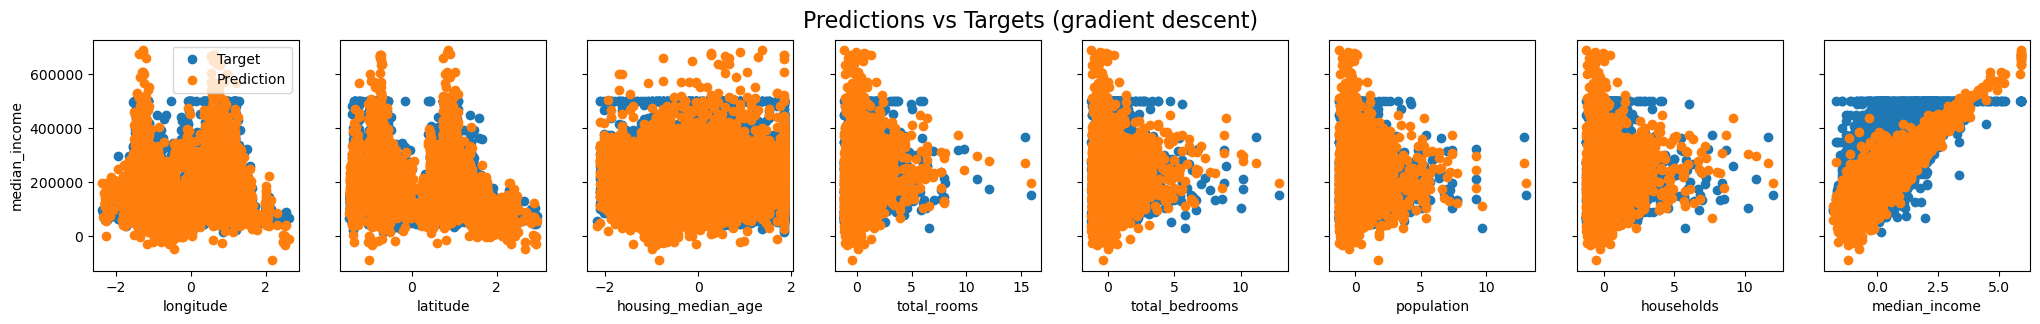

In [69]:
fig, ax = plt.subplots(1, X_test_norm.shape[1], sharey=True, figsize=(25, 3))

if X_test_norm.shape[1] == 1: ax = [ax]

for i in range(X_test_norm.shape[1]):
    ax[i].scatter(X_test_norm[:, i], y_test, label='Target')
    ax[i].set_xlabel(X_test.columns[i])
    ax[i].scatter(X_test_norm[:, i], y_pred_sgd, label='Prediction')

ax[0].set_ylabel(X.columns[-1])
ax[0].legend()

fig.suptitle('Predictions vs Targets (gradient descent)', fontsize=16)
plt.show()


In [70]:
# as we can see, the model using gradient descent is not very accurate.

# let's try a different method of linear regression - using the normal eqn.

In [71]:
model_eqn = LinearRegression()
model_eqn.fit(X_norm, y_train)

LinearRegression()

In [72]:
b_eqn = model_eqn.intercept_
w_eqn = model_eqn.coef_

print(f"Model parameters: b: {b_eqn}, w: {w_eqn}")

Model parameters: b: 207222.72236450468, w: [-86068.69742987 -91736.73814863  14317.51912137 -13514.19926115
  36127.10561307 -41896.98968362  24144.698687    75581.51468011]


In [73]:
# the weights of the two models are very similar.

In [74]:
y_pred_eqn = model_eqn.predict(X_test_norm)

print(f"Accuracy: {model_eqn.score(X_test_norm, y_test)*100:0.2f}%")

Accuracy: 63.96%


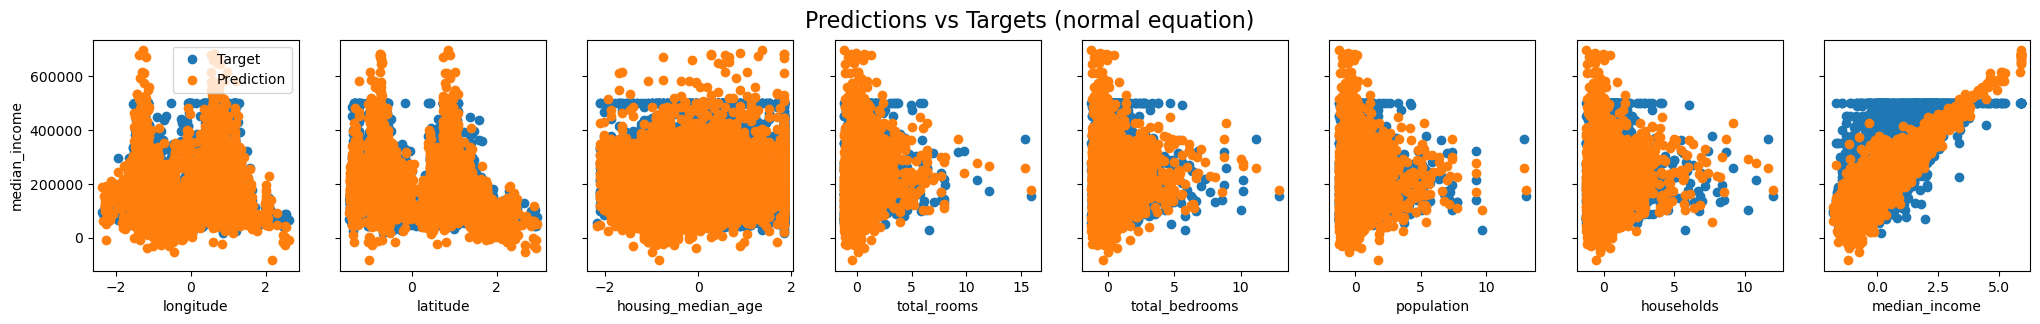

In [75]:
fig, ax = plt.subplots(1, X_test_norm.shape[1], sharey=True, figsize=(25, 3))

if X_test_norm.shape[1] == 1: ax = [ax]

for i in range(X_test_norm.shape[1]):
    ax[i].scatter(X_test_norm[:, i], y_test, label='Target')
    ax[i].set_xlabel(X_test.columns[i])
    ax[i].scatter(X_test_norm[:, i], y_pred_eqn, label='Prediction')

ax[0].set_ylabel(X.columns[-1])
ax[0].legend()

fig.suptitle('Predictions vs Targets (normal equation)', fontsize=16)
plt.show()

In [ ]:
# the accuracies predictions of the two models are very similar.